In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv(r"D:\Datasets\laptop_data.csv")

In [3]:
df.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
lap=df.copy()

In [6]:
lap["ScreenResolution"]=lap["ScreenResolution"].str.split(" ")

In [7]:
def func(x):
    if "Touchscreen" in x:
        return "Touchscreeen"
    else:
        return "Not"
    
lap["Screen"]=lap["ScreenResolution"].apply(func)

In [8]:
lap["Cpu"]=lap["Cpu"].str.split(" ")

In [9]:
def func(x):
    if "Intel" in x:
        return "Intel"
    elif "AMD" in x:
        return "AMD"
    elif "Samsung" in x:
        return "AMD"
    
lap["Cpu"]=lap["Cpu"].apply(func)

In [10]:
lap["Ram"]=lap["Ram"].str.replace("GB","").astype(int)

In [11]:
lap["Memory"]=lap["Memory"].str.replace("GB"," ")

In [12]:
def func(x):
    if "SSD" in x:
        return "SSD"
    elif "Flash Storage" in x:
        return "Flash Storage"
    elif "HDD" in x:
        return "HDD"
    elif "TB" in x:
        return "TB"
    elif "Hybird" in x:
        return "Hybrid"
    
lap["Memory_Type"]=lap["Memory"].apply(func)

In [13]:
lap["Memory"]=lap["Memory"].str.replace("SSD"," ")
lap["Memory"]=lap["Memory"].str.replace("Flash Storage"," ")
lap["Memory"]=lap["Memory"].str.replace("HDD"," ")
lap["Memory"]=lap["Memory"].str.replace("TB"," ")
lap["Memory"]=lap["Memory"].str.replace("Hybrid"," ")

In [14]:
lap["Gpu"]=lap["Gpu"].str.split(" ")

In [15]:
def func(x):
    if "Intel" in x:
        return "Intel"
    elif "AMD" in x:
        return "AMD"
    elif "Nvidia" in x:
        return "Nvidia"
    else:
        return "Intel"
    
lap["Gpu"]=lap["Gpu"].apply(func)

In [16]:
lap["Weight"]=lap["Weight"].str.replace("kg","").astype(float)
lap["Memory"]=lap["Memory"].str.split("+").str[0].str.strip()
lap["Memory"]=lap["Memory"].astype(float)

In [17]:
lap["Memory"]=lap["Memory"].astype(int)

In [18]:
def func(x):
    if "Windows 10" in x or "Windows 7" in x or "Windows 10 S" in x:
        return "Windows"
    elif "macOS" in x or "Mac OS X" in x:
        return "Macos"
    else:
        return "Other"

lap["OpSys"] = lap["OpSys"].apply(func)


In [19]:
lap=lap.drop(columns=["ScreenResolution"])

In [20]:

X=lap[["Company","TypeName","Inches","Cpu","Ram","Gpu","OpSys","Weight","Screen","Memory_Type"]]
y=lap["Price"]
y_log=np.log1p(y)

(array([ 19.,  76., 151., 191., 261., 270., 216.,  98.,  17.,   4.]),
 array([ 9.13472419,  9.49039619,  9.84606819, 10.20174019, 10.55741219,
        10.9130842 , 11.2687562 , 11.6244282 , 11.9801002 , 12.3357722 ,
        12.69144421]),
 <BarContainer object of 10 artists>)

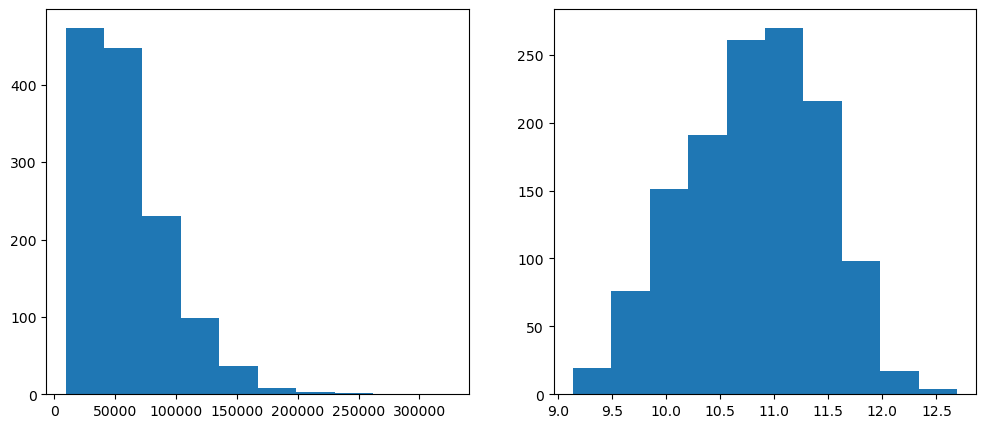

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(y)
plt.subplot(1,2,2)
plt.hist(y_log)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,y_log,test_size=0.2,random_state=42)

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import r2_score
import pickle

In [24]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [25]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

cl1 = ColumnTransformer(transformers=[
    ("OHE_categories", ohe,
     ["Company", "TypeName", "Cpu", "Gpu", "OpSys", "Screen", "Memory_Type"])
], remainder="passthrough", force_int_remainder_cols=False)


In [26]:
lr=LinearRegression()

In [27]:
pipe=make_pipeline(cl1,lr)

In [28]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('OHE_categories',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Company', 'TypeName', 'Cpu',
                                                   'Gpu', 'OpSys', 'Screen',
                                                   'Memory_Type'])])),
                ('linearregression', LinearRegression())])

In [29]:
y_predict=pipe.predict(x_test)

In [30]:
r2=r2_score(y_test,y_predict)

In [31]:
r2

0.7440429042651217

In [32]:
ridge=Ridge(alpha=1.0)
pipe=make_pipeline(cl1,ridge)
pipe.fit(x_train,y_train)
y_predict=pipe.predict(x_test)
r2_ridge=r2_score(y_test,y_predict)
print(r2_ridge)

0.7420844445264718


In [33]:
lasso=Lasso(alpha=1.0,max_iter=10000)
pipe=make_pipeline(cl1,lasso)
pipe.fit(x_train,y_train)
y_predict=pipe.predict(x_test)
r2_lasso=r2_score(y_test,y_predict)
print(r2_lasso)

0.38199333872871777


In [34]:
DT=DecisionTreeRegressor(max_depth=8)
pipe=make_pipeline(cl1,DT)
pipe.fit(x_train,y_train)
y_predict=pipe.predict(x_test)
r2_DT=r2_score(y_test,y_predict)
print(r2_DT)

0.72257116095474


In [35]:
RF=RandomForestRegressor(n_estimators=100,random_state=42,max_depth=15,
                         max_samples=0.5,max_features=0.75)
pipe=make_pipeline(cl1,RF)
pipe.fit(x_train,y_train)
y_predict=pipe.predict(x_test)
r2_RF=r2_score(y_test,y_predict)
print(r2_RF)

0.8126973424476256


In [36]:
GB=GradientBoostingRegressor(n_estimators=100,random_state=42,learning_rate=0.1)
pipe=make_pipeline(cl1,GB)
pipe.fit(x_train,y_train)
y_predict=pipe.predict(x_test)
r2_GB=r2_score(y_test,y_predict)
print(r2_GB)

0.7976569905206884


In [37]:
XGB=XGBRegressor(n_estimators=300,random_state=42,learning_rate=0.1)
pipe=make_pipeline(cl1,XGB)
pipe.fit(x_train,y_train)
y_predict=pipe.predict(x_test)
r2_XGB=r2_score(y_test,y_predict)
print(r2_XGB)

0.8091468047638661


In [38]:
knn=KNeighborsRegressor(n_neighbors=5)
pipe=make_pipeline(cl1,XGB)
pipe.fit(x_train,y_train)
y_predict=pipe.predict(x_test)
r2_knn=r2_score(y_test,y_predict)
print(r2_knn)

0.8091468047638661


In [39]:
svr_pipe = Pipeline([
    ('preprocessing', cl1),  # your existing ColumnTransformer
    ('scaler', StandardScaler()),  # scale features for SVR
    ('svr', SVR(kernel='rbf', C=100, epsilon=0.1))  # you can tune C, epsilon
])

svr_pipe.fit(x_train, y_train)
svr_pred = svr_pipe.predict(x_test)
print(r2_score(y_test, svr_pred))

0.7911000526641886


In [40]:
lr_=[]
ridge_=[]
knn_=[]
xgb=[]
gb=[]
rf=[]
dt=[]
for i in range(1,100):
     x_train,x_test,y_train,y_test=train_test_split(X,y_log,test_size=0.2,random_state=i)

     lr=LinearRegression()
     pipe=make_pipeline(cl1,lr)
     pipe.fit(x_train,y_train)
     y_predict=pipe.predict(x_test)
     lr_.append(r2_score(y_test,y_predict))
     

     ridge=Ridge(alpha=1.0)
     pipe=make_pipeline(cl1,ridge)
     pipe.fit(x_train,y_train)
     y_predict=pipe.predict(x_test)
     ridge_.append(r2_score(y_test,y_predict))

     DT=DecisionTreeRegressor(max_depth=8)
     pipe=make_pipeline(cl1,DT)
     pipe.fit(x_train,y_train)
     y_predict=pipe.predict(x_test)
     dt.append(r2_score(y_test,y_predict))

     RF=RandomForestRegressor(n_estimators=100,random_state=42,max_depth=15,
                         max_samples=0.5,max_features=0.75)
     pipe=make_pipeline(cl1,RF)
     pipe.fit(x_train,y_train)
     y_predict=pipe.predict(x_test)
     rf.append(r2_score(y_test,y_predict))

     GB=GradientBoostingRegressor(n_estimators=100,random_state=42,learning_rate=0.1)
     pipe=make_pipeline(cl1,GB)
     pipe.fit(x_train,y_train)
     y_predict=pipe.predict(x_test)
     gb.append(r2_score(y_test,y_predict))

     XGB=XGBRegressor(n_estimators=300,random_state=42,learning_rate=0.1)
     pipe=make_pipeline(cl1,XGB)
     pipe.fit(x_train,y_train)
     y_predict=pipe.predict(x_test)
     xgb.append(r2_score(y_test,y_predict))

     knn=KNeighborsRegressor(n_neighbors=5)
     pipe=make_pipeline(cl1,knn)
     pipe.fit(x_train,y_train)
     y_predict=pipe.predict(x_test)
     knn_.append(r2_score(y_test,y_predict))


     


     
     

 

In [41]:
print("Linear",lr_[np.argmax(lr)])
print("Ridge",ridge_[np.argmax(ridge)])
print("DT",dt[np.argmax(dt)])
print("gb",gb[np.argmax(gb)])
print("Xgb",xgb[np.argmax(xgb)])
print("knn",knn_[np.argmax(knn_)])

Linear 0.7703440174004387
Ridge 0.7706969507744756
DT 0.8376583783892904
gb 0.8643601380661412
Xgb 0.8808890108296088
knn 0.8512242516352182


In [42]:

x_train,x_test,y_train,y_test=train_test_split(X,y_log,test_size=0.2,random_state=np.argmax(xgb))
XGB=XGBRegressor(n_estimators=300,random_state=42,learning_rate=0.1)
pipe=make_pipeline(cl1,XGB)
pipe.fit(x_train,y_train)
y_predict=pipe.predict(x_test)
print(r2_score(y_test,y_predict))

0.8441165211635471


In [43]:
lap.to_csv("laptop.csv")

In [44]:
with open("model_lap","wb") as f:
    pickle.dump(pipe,f)

In [45]:
lap.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Screen,Memory_Type
0,0,Apple,Ultrabook,13.3,Intel,8,128,Intel,Macos,1.37,71378.6832,Not,SSD
1,1,Apple,Ultrabook,13.3,Intel,8,128,Intel,Macos,1.34,47895.5232,Not,Flash Storage
2,2,HP,Notebook,15.6,Intel,8,256,Intel,Other,1.86,30636.0000,Not,SSD
3,3,Apple,Ultrabook,15.4,Intel,16,512,AMD,Macos,1.83,135195.3360,Not,SSD
4,4,Apple,Ultrabook,13.3,Intel,8,256,Intel,Macos,1.37,96095.8080,Not,SSD


In [46]:
s=lap["Weight"]
s

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float64

In [47]:
s[np.argmax(s)]

4.7